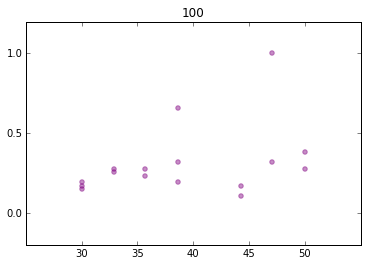

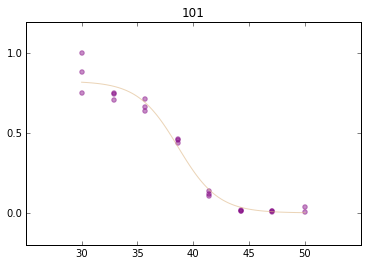

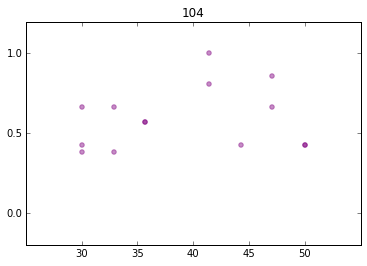

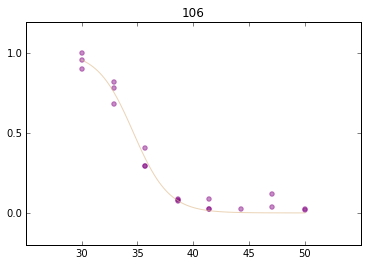

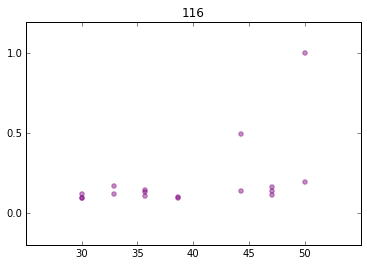

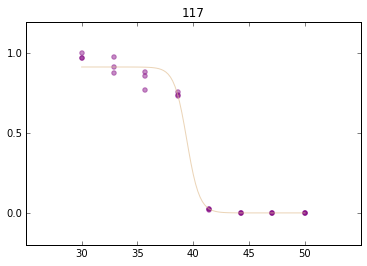

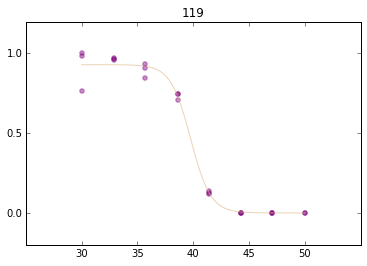

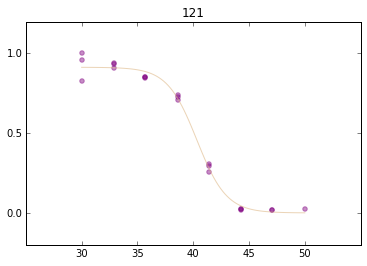

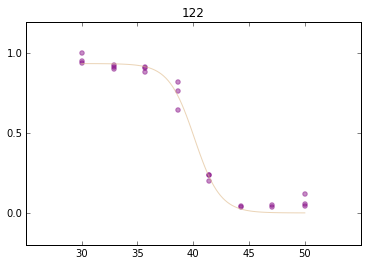

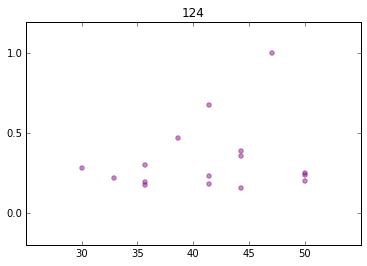

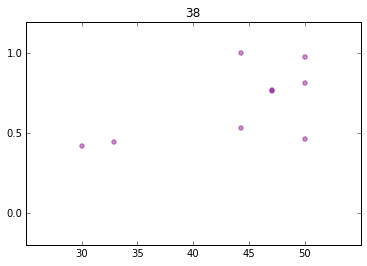

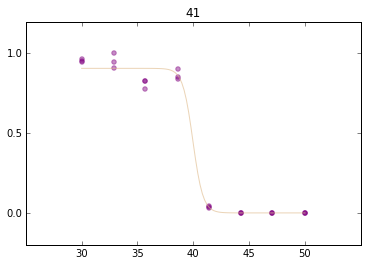

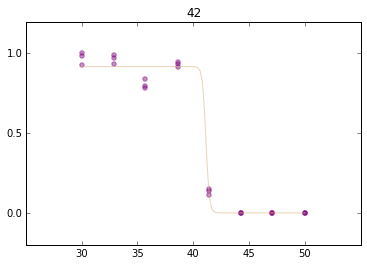

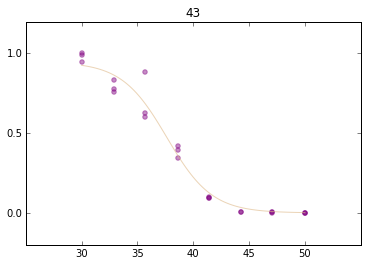

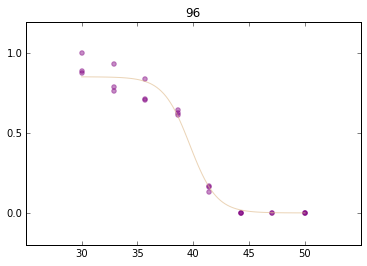

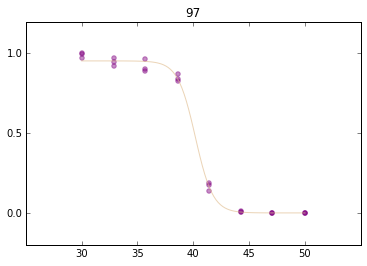

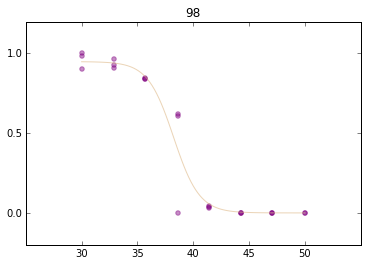

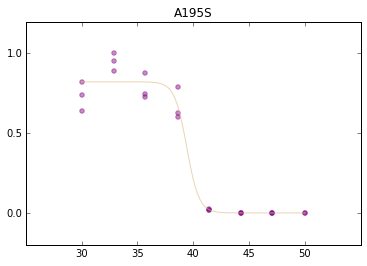

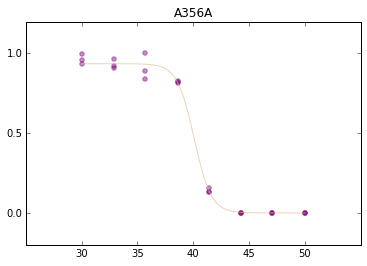

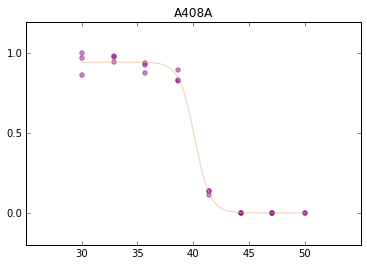

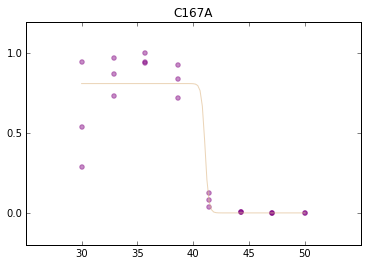

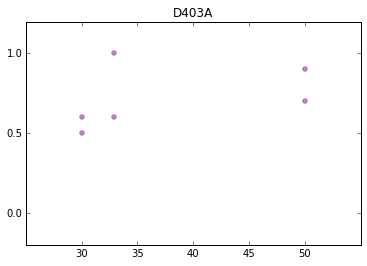

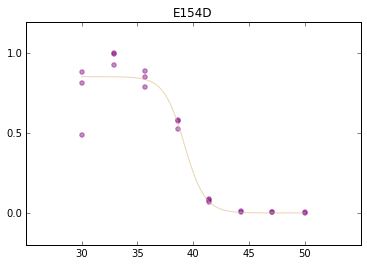

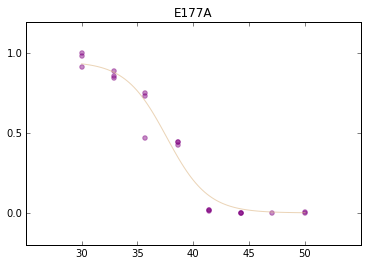

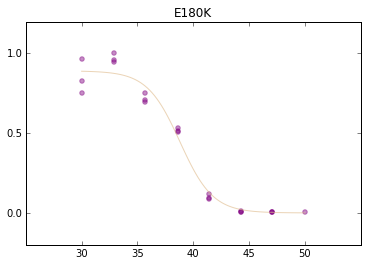

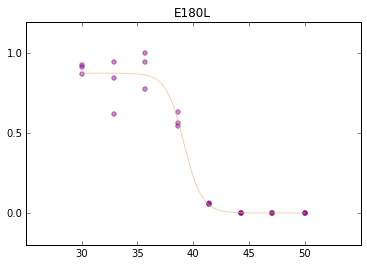

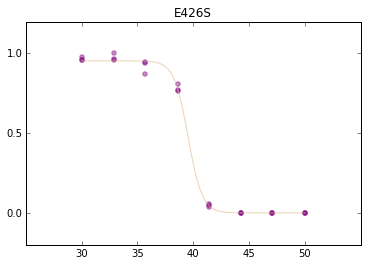

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


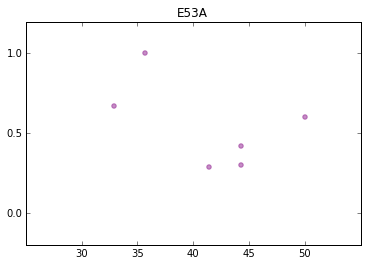

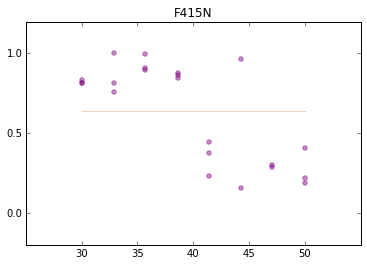

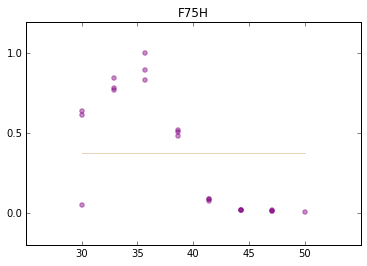

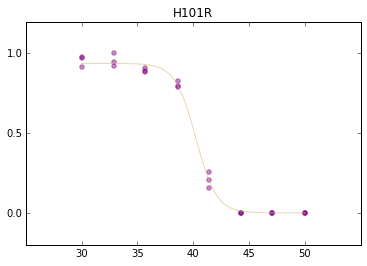

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


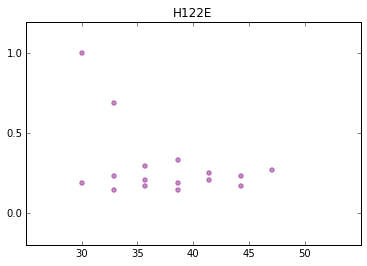

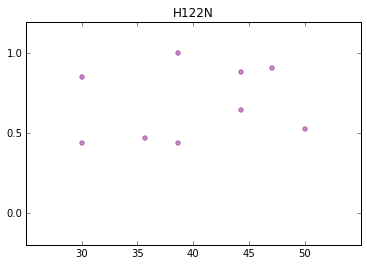

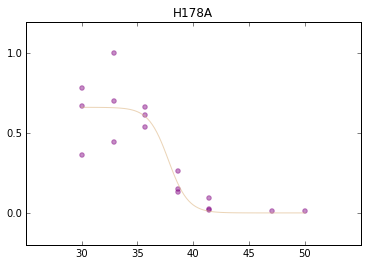

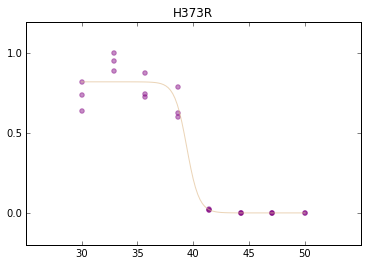

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


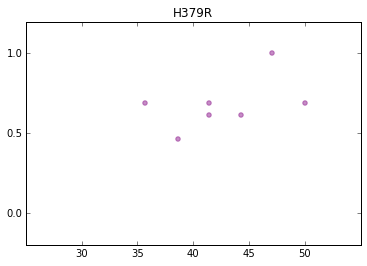

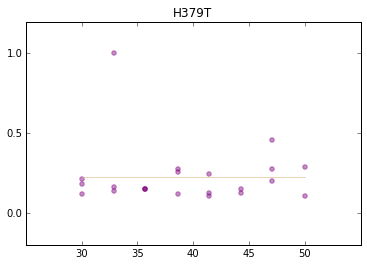

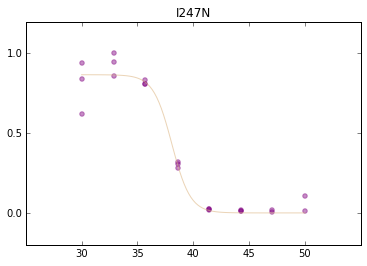

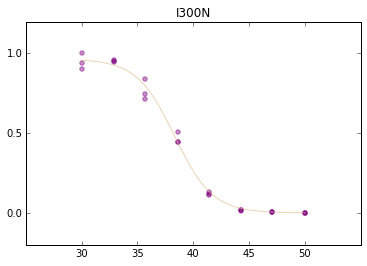

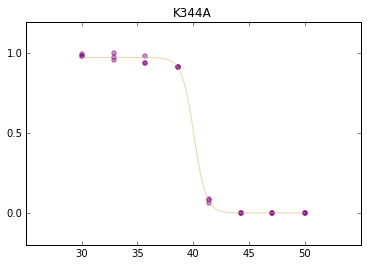

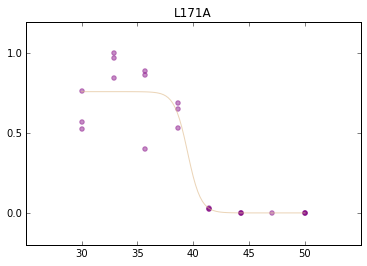

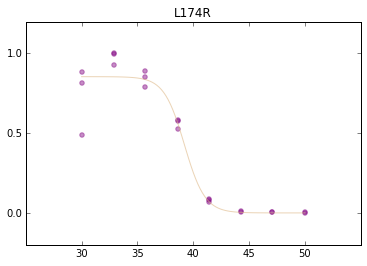

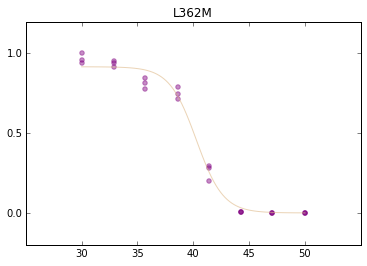

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


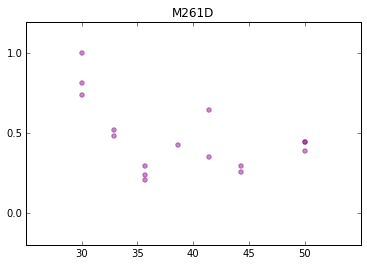

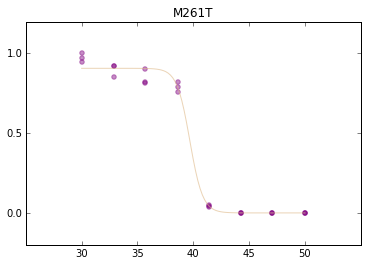

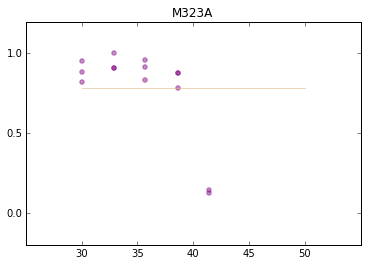

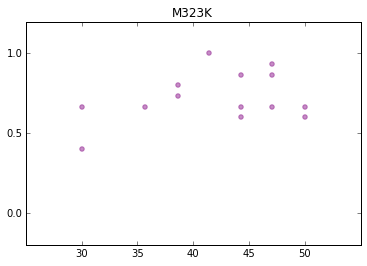

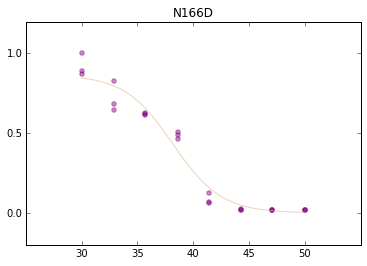

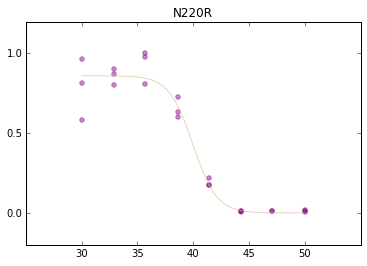

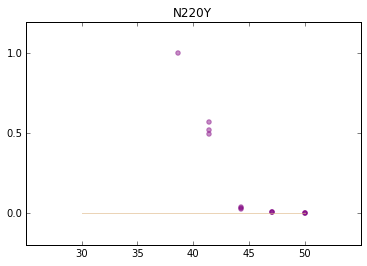

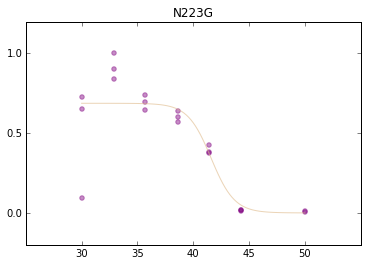

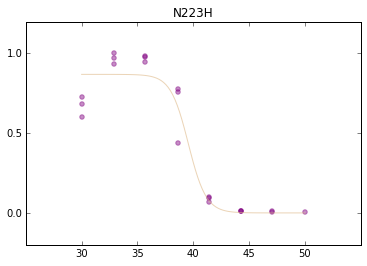

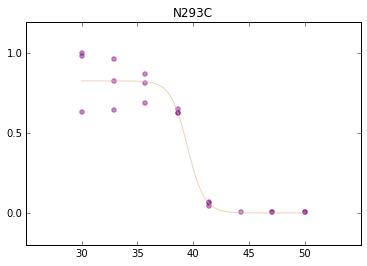

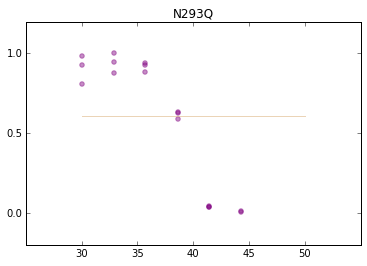

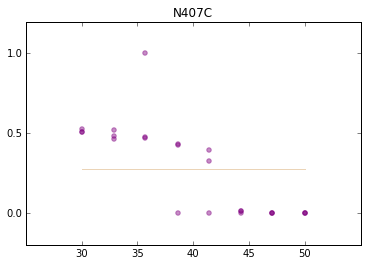

Improper input: N=3 must not exceed M=2


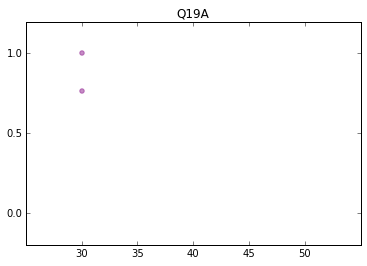

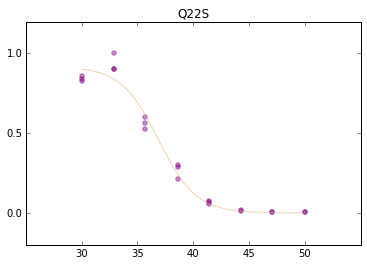

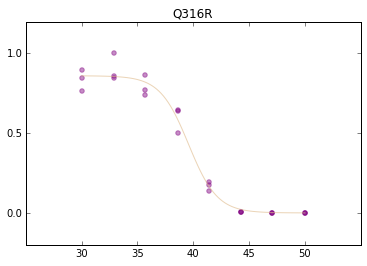

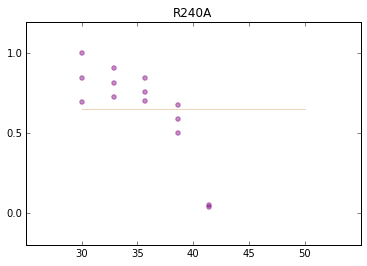

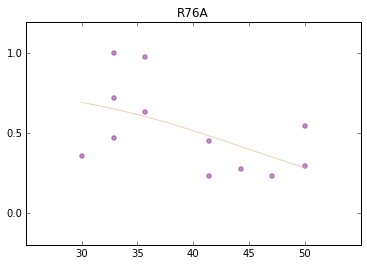

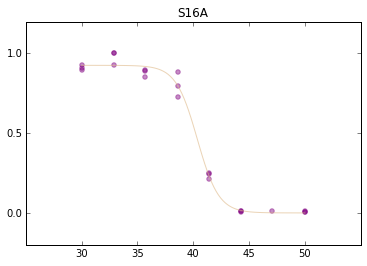

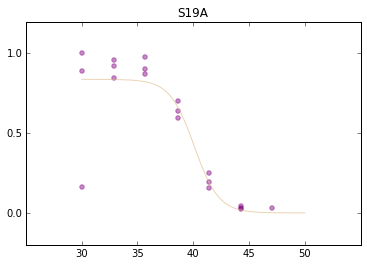

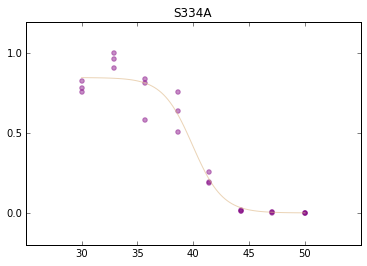

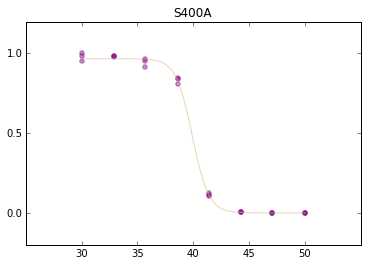

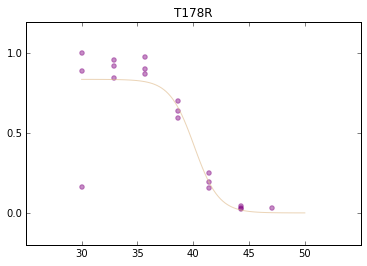

Improper input: N=3 must not exceed M=2


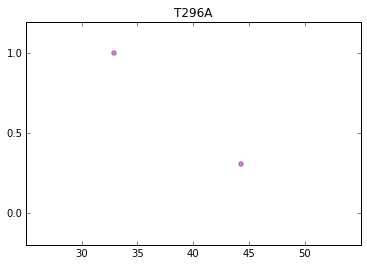

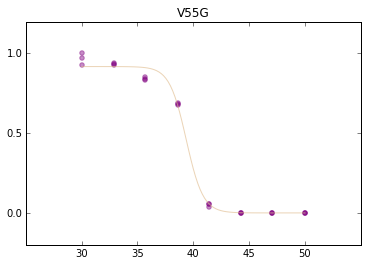

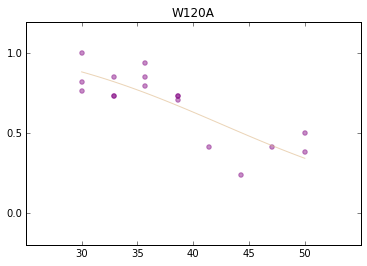

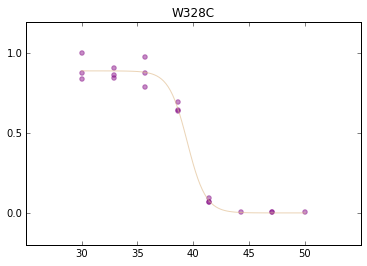

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


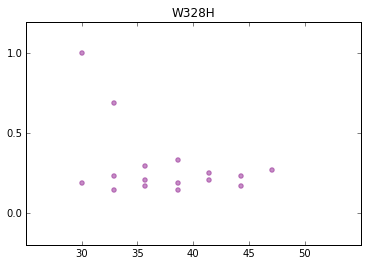

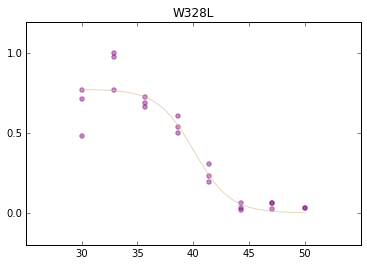

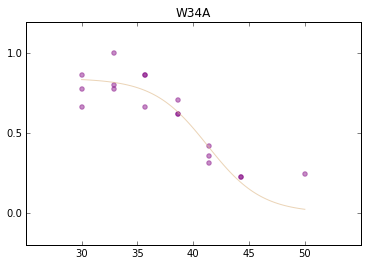

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


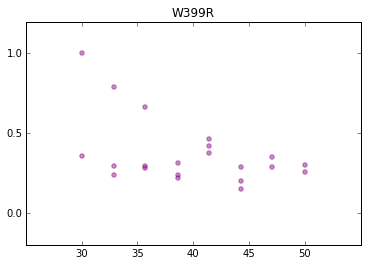

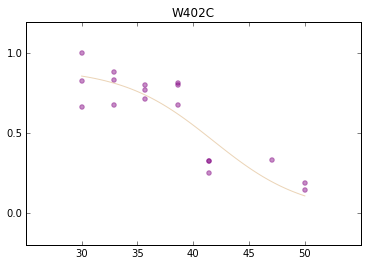

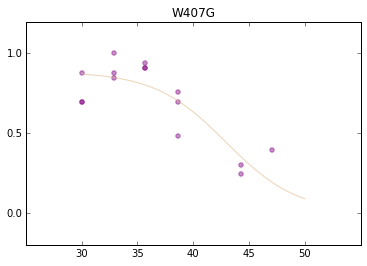

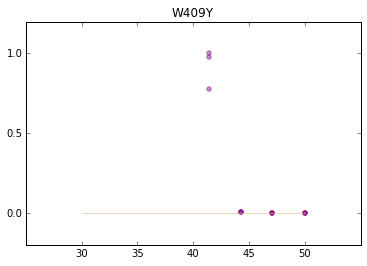

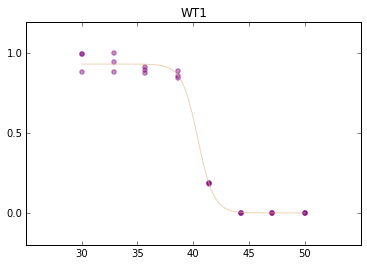

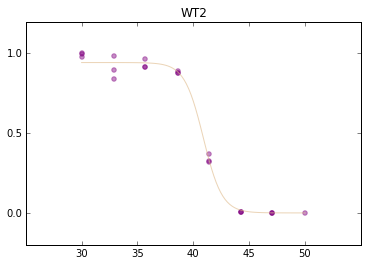

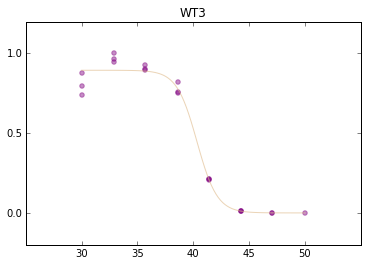

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


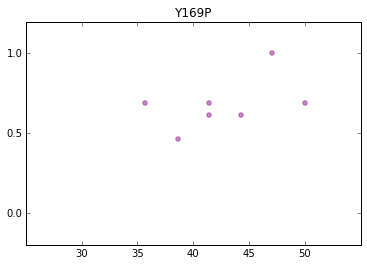

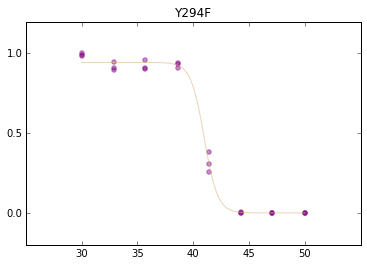

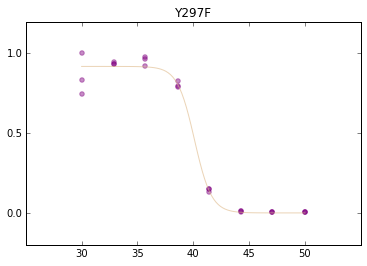

In [7]:
import pandas 
import matplotlib.pyplot as plt 
from numpy import diag, sqrt, exp, linspace
from scipy.optimize import curve_fit, OptimizeWarning
from scipy.stats import linregress
%matplotlib inline

def f( x, tm, L, k ): 
    return L / ( 1 + exp( -k * ( x - tm ) ) )

data = pandas.read_csv( '/Users/alex/Documents/bagel-thermostability/data-clean.csv' )
data = data[( data.rate >= 0 )]

mutants = data.groupby( 'mutant' )

for index, mutant in enumerate( mutants ):
    name, df = mutant 
    df.rate = df.rate / df.rate.max()
    plt.scatter( df.temp, df.rate, color='purple', alpha=0.45 )
    
    try:
        slope, intercept, r_value, p_value, std_err = linregress( df.temp, df.rate )
        p0 = ( df.temp.mean(), df.rate.max(), slope/10 )
        popt, pcov = curve_fit( f, df.temp, df.rate, p0 )
        perr = sqrt( diag( pcov ) )
        xvals = linspace( 30, 50, 99 )
        
        if popt[2] < 0:
            plt.plot( xvals, f( xvals, *popt ), color='burlywood', alpha=0.6 )
        
    except Exception as e:
        print e
    
    plt.xticks( range( 30, 51, 5 ) )
    plt.yticks( [ 0, 0.5, 1 ] )
    plt.axis( [ 25, 55, -0.2, 1.2 ] )
    
    plt.title( name ) 
    plt.show()